#Import Data
Importing the data and then splitting the data into training and test sets. Inorder for followng code to work make sure the [dataset](https://drive.google.com/file/d/1a6zV8PFF81JqpU6scGqyQNZYXjkK9M1u/view?usp=sharing) is in your main drive folder.

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
import pandas as pd
import numpy as np

dataset = pd.read_csv('drive/My Drive/spam_ham_dataset.csv')
dataset.head(5)

,Unnamed: 0,label,text,label_num
0,605,ham,Subject: enron methanol ; meter # : 988291\r\n...,0
1,2349,ham,"Subject: hpl nom for january 9 , 2001\r\n( see...",0
2,3624,ham,"Subject: neon retreat\r\nho ho ho , we ' re ar...",0
3,4685,spam,"Subject: photoshop , windows , office . cheap ...",1
4,2030,ham,Subject: re : indian springs\r\nthis deal is t...,0


In [ ]:
dataset.dtypes

Unnamed: 0     int64
label         object
text          object
label_num      int64
dtype: object

In [ ]:
from sklearn.model_selection import train_test_split

X = dataset[['text']]
y = dataset['label']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=888)
print('Train Shape:', X_train.shape)
print('Test Shape: ', X_test.shape)

Train Shape: (3619, 1)
Test Shape:  (1552, 1)


##Jack's Modeling Section

I referenced [this](https://www.kaggle.com/code/nagasai524/spam-email-classification-using-word2vec) users' code when constructing my models for implementing a word2vec with the data.

###Prepocessing of data

In [ ]:
!pip install contractions

     |████████████████████████████████| 287 kB 4.1 MB/s 
     |████████████████████████████████| 106 kB 57.2 MB/s 


In [ ]:
import contractions
#contractions is the package in python used to expand the contractions in english language to their original form. Example: I'll to "I will"
from tqdm import tqdm
#tqdm package is used to track the progress of work. It displays the percentage of loop done.
import nltk
#nltk is a suite of libraries that are mainly used for dealing with problems related to Natural language processing.
import re
nltk.download('stopwords')
from nltk.corpus import stopwords
#donwloadin the stopwords of english language
stopwords=stopwords.words('english')
#Removing stopwords 'no','nor' and 'not'
stopwords.remove('no')
stopwords.remove('nor')
stopwords.remove('not')

In [ ]:
processed_mails=[]
for i in tqdm(dataset['text']):
    #Regular expression that removes all the html tags pressent in the reviews
    i=re.sub('(<[\w\s]*/?>)',"",i)
    #Expanding all the contractions present in the review to is respective actual form
    i=contractions.fix(i)
    #Removing all the special charactesrs from the review text
    i=re.sub('[^a-zA-Z0-9\s]+',"",i)
    #Removing all the digits present in the review text
    i=re.sub('\d+',"",i)
    #Making all the review text to be of lower case as well as removing the stopwords and words of length less than 3
    processed_mails.append(" ".join([j.lower() for j in i.split() if j not in stopwords and len(j)>=3]))

100%|██████████| 5171/5171 [00:05<00:00, 967.24it/s]


In [ ]:
#Creating a new datafram using the Processed Reviews
processed_df=pd.DataFrame({'text':processed_mails,'Spam/Ham':list(dataset['label_num'])})
processed_df.head()

,text,Spam/Ham
0,subject enron methanol meter follow note gave ...,0
1,subject hpl nom january see attached file hpln...,0
2,subject neon retreat around wonderful time yea...,0
3,subject photoshop windows office cheap main tr...,1
4,subject indian springs deal book teco pvr reve...,0


In [ ]:
#Splitting the data into dependent and independent variables i.e, features and the target columns
X=processed_df['text']
Y=processed_df['Spam/Ham']
#Splitting the data such that 33% will be used for testing and the remaining 67% will be used for training. 
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(X,Y,stratify=Y,test_size=0.3, random_state=888)
#when stratify is provided the splitting of data into train and test datasets agree with the composition of actual possitive and negative reviews present in the dataset

In [ ]:
from gensim.models import Word2Vec

In [ ]:
words_in_sentences=[]
for i in tqdm(x_train):
    words_in_sentences.append(i.split())

100%|██████████| 3619/3619 [00:00<00:00, 51791.78it/s]


In [ ]:
model = Word2Vec(sentences=words_in_sentences, size=200,workers=-1)

In [ ]:
model.wv.most_similar('lottery', topn=10)

[('susan', 0.24960918724536896),
 ('ksign', 0.2354843020439148),
 ('kri', 0.2193181812763214),
 ('manual', 0.21208517253398895),
 ('hurricane', 0.21140602231025696),
 ('platinum', 0.20669244229793549),
 ('rivers', 0.20443539321422577),
 ('expensive', 0.20283722877502441),
 ('damn', 0.20105822384357452),
 ('immediately', 0.20058733224868774)]

In [ ]:
vocab=list(model.wv.vocab)
print(len(vocab))

6888


In [ ]:
def avg_w2vec(sentences):
    transformed=[]
    for sentence in tqdm(sentences):
        count=0
        vector=np.zeros(200)
        for word in sentence.split():
            if word in vocab:
                vector+=model.wv.get_vector(word)
                count+=1
        if count!=0:
            vector/=count
            transformed.append(vector)
        else:
            print(sentence)
    return np.array(transformed)

In [ ]:
x_train_transformed=avg_w2vec(x_train)
x_test_transformed=avg_w2vec(x_test)

 25%|██▌       | 921/3619 [00:16<01:44, 25.81it/s]

In [ ]:
def avg_w2vec(sentences):
    transformed=[]
    for sentence in tqdm(sentences):
        count=0
        vector=np.zeros(200)
        for word in sentence.split():
            if word in vocab:
                vector+=model.wv.get_vector(word)
                count+=1
        if count!=0:
            vector/=count
            transformed.append(vector)
        else:
            print(sentence)
    return np.array(transformed)

In [ ]:
x_train_transformed=avg_w2vec(x_train)
x_test_transformed=avg_w2vec(x_test)

###Models

In [ ]:
from sklearn.model_selection import GridSearchCV, RepeatedStratifiedKFold
from sklearn.linear_model import LogisticRegression
grid_params = {'solver':('newton-cg', 'lbfgs', 'liblinear'), 
               'penalty':['none', 'l1', 'l2', 'elasticnet'],
               'C':[1e-5,1e-4,.001,.01,.1,0,1,10,100]}
cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=3, random_state=1)
logreg = LogisticRegression()
clf1 = GridSearchCV(logreg, grid_params,n_jobs=-1,verbose=1, cv = cv)
clf1.fit(x_train_transformed,y_train)

In [ ]:
print('Best Params: ',clf1.best_params_)
print('Best Score: ', clf1.best_score_)

In [ ]:
from sklearn.model_selection import GridSearchCV
from sklearn.svm import SVC
grid_params = {'kernel':('linear', 'rbf', 'sigmoid'),
               'C':[.01, .1, 1, 10, 100]}
svc = SVC()
clf2 = GridSearchCV(svc, grid_params,n_jobs=-1,verbose=1)
clf2.fit(x_train_transformed,y_train)

In [ ]:
print('Best Params: ',clf2.best_params_)
print('Best Score: ', clf2.best_score_)

In [ ]:
from sklearn.model_selection import GridSearchCV
from sklearn.neighbors import KNeighborsClassifier
grid_params = { 'n_neighbors' : [5,10,20,30,40,50,60],
               'weights':['uniform','distance'],
               'metric' : ['manhattan', 'euclidean', 'minkowski']}
knn=KNeighborsClassifier()
clf3 = GridSearchCV(knn, grid_params,n_jobs=-1,verbose=1)
clf3.fit(x_train_transformed,y_train)

In [ ]:
print('Best Params: ',clf3.best_params_)
print('Best Score: ', clf3.best_score_)

###Current Best

SVC model with following specifications and accuracies outlined in code blocks.

In [ ]:
print('Best Params: ',clf2.best_params_)
print('Best Score: ', clf2.best_score_)

In [ ]:
import seaborn as sns
sns.heatmap(confusion_matrix(y_train,clf2.predict(x_train_transformed)), annot=True)

In [ ]:
from sklearn.metrics import roc_curve, auc,classification_report,confusion_matrix
print('Train accuracy: \n', classification_report(y_train,clf2.predict(x_train_transformed)))
print('Test accuracy: \n', classification_report(y_test,clf2.predict(x_test_transformed)))

##Erica's Modeling Section

I transformed the data with a TF-IDF vectorizer and then I used a Multinomial Naive Bayes classifier. I referenced [this code](https://www.kaggle.com/code/jeffysonar/spam-filter-using-naive-bayes-classifier) for my section.




In [ ]:
dataset.head()

,Unnamed: 0,label,text,label_num
0,605,ham,Subject: enron methanol ; meter # : 988291\r\n...,0
1,2349,ham,"Subject: hpl nom for january 9 , 2001\r\n( see...",0
2,3624,ham,"Subject: neon retreat\r\nho ho ho , we ' re ar...",0
3,4685,spam,"Subject: photoshop , windows , office . cheap ...",1
4,2030,ham,Subject: re : indian springs\r\nthis deal is t...,0


In [ ]:
dataset.drop(columns=['Unnamed: 0', 'label_num'], axis = 1, inplace = True)
dataset.head()

,label,text
0,ham,Subject: enron methanol ; meter # : 988291\r\n...
1,ham,"Subject: hpl nom for january 9 , 2001\r\n( see..."
2,ham,"Subject: neon retreat\r\nho ho ho , we ' re ar..."
3,spam,"Subject: photoshop , windows , office . cheap ..."
4,ham,Subject: re : indian springs\r\nthis deal is t...


In [ ]:
import re
import string
import nltk
nltk.download('stopwords')
from nltk.corpus import stopwords
from nltk import PorterStemmer as Stemmer

def process(text):
    # make lowercase
    text = text.lower()
    # remove punctuation
    text = ''.join([t for t in text if t not in string.punctuation])
    # remove stopwords
    text = [t for t in text.split() if t not in stopwords.words('english')]
    # stemming
    st = Stemmer()
    text = [st.stem(t) for t in text]
    # return token list
    return text

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


In [ ]:
from sklearn.feature_extraction.text import TfidfVectorizer

tfidfv = TfidfVectorizer(analyzer=process)
data = tfidfv.fit_transform(dataset['text'])

In [ ]:
from sklearn.pipeline import Pipeline
from sklearn.naive_bayes import MultinomialNB

spam_filter = Pipeline([
    ('vectorizer', TfidfVectorizer(analyzer=process)), # TFIDF score
    ('classifier', MultinomialNB())                    # Naive Bayes classifier
])

In [ ]:
X = dataset['text']
y = dataset['label']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3)

In [ ]:
spam_filter.fit(X_train, y_train)

Pipeline(steps=[('vectorizer',
                 TfidfVectorizer(analyzer=<function process at 0x7fbb3c307710>)),
                ('classifier', MultinomialNB())])

In [ ]:
predictions = spam_filter.predict(X_test)

In [ ]:
count = 0
for i in range(len(y_test)):
    if y_test.iloc[i] != predictions[i]:
        count += 1
print('Number of test emails:', len(y_test))
print('Number of wrong predictions:', count)

Number of test emails: 1552
Number of wrong predictions: 136


In [ ]:
from sklearn.metrics import confusion_matrix
print(confusion_matrix(y_test, predictions))

[[1096    0]
 [ 136  320]]


In [ ]:
from sklearn.metrics import classification_report
print(classification_report(y_test, predictions))

              precision    recall  f1-score   support

         ham       0.89      1.00      0.94      1096
        spam       1.00      0.70      0.82       456

    accuracy                           0.91      1552
   macro avg       0.94      0.85      0.88      1552
weighted avg       0.92      0.91      0.91      1552



/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_roc_curve is deprecated; Function :func:`plot_roc_curve` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: :meth:`sklearn.metric.RocCurveDisplay.from_predictions` or :meth:`sklearn.metric.RocCurveDisplay.from_estimator`.
  warnings.warn(msg, category=FutureWarning)


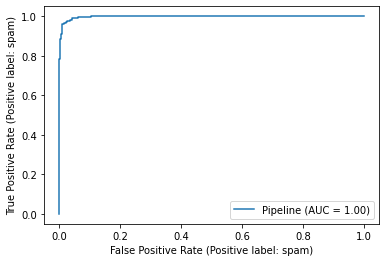

In [ ]:
import matplotlib.pyplot as plt
from sklearn import metrics

plot = metrics.plot_roc_curve(spam_filter, X_test, y_test) 
plot

In [ ]:
def detect_spam(s):
    return spam_filter.predict([s])[0]
detect_spam('I am reaching out to you about the job you applied for.')

'ham'

In [ ]:
def detect_spam(s):
    return spam_filter.predict([s])[0]
detect_spam('Click this link for free money!')

'spam'

##Charlotte's Modeling Section

RNN Model


In [ ]:
import pandas as pd
import numpy as np

In [ ]:
train = dataset.sample(frac=0.7, random_state=25)
test = dataset.drop(train.index)
print(f"No. of training examples: {train.shape[0]}")
print(f"No. of testing examples: {test.shape[0]}")

No. of training examples: 3620
No. of testing examples: 1551


Text transformation: transform text to "tokens ids"

In [ ]:
X_train = train['label'] + ' ' + train['text']
y_train = train['label_num']
X_test = test['label'] + ' ' + test['text']
y_test = test['label_num']

In [ ]:
from keras.preprocessing.text import Tokenizer
max_words = 300
tokenizer = Tokenizer(num_words=max_words, lower=True, split=' ')
# Only the 300 words with the highest frequency are assigned ids，ignore others
tokenizer.fit_on_texts(list(X_train)+list(X_test)) # tokenizer train
X_train_tokens = tokenizer.texts_to_sequences(X_train)
X_test_tokens = tokenizer.texts_to_sequences(X_test)

In [ ]:
maxlen = 100
from keras.preprocessing import sequence
X_train_tokens_pad = sequence.pad_sequences(X_train_tokens, maxlen=maxlen,padding='post')
X_test_tokens_pad = sequence.pad_sequences(X_test_tokens, maxlen=maxlen,padding='post')

In [ ]:
#Model building

embeddings_dim = 30 # 
from keras.models import Model, Sequential
from keras.layers import Embedding, LSTM, GRU, SimpleRNN, Dense
model = Sequential()
model.add(Embedding(input_dim=max_words, # Size of the vocabulary
                    output_dim=embeddings_dim, # 
                    input_length=maxlen))
model.add(GRU(units=64)) # could change to  SimpleRNN ， LSTM
model.add(Dense(units=1, activation='sigmoid'))
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding (Embedding)       (None, 100, 30)           9000      
                                                                 
 gru (GRU)                   (None, 64)                18432     
                                                                 
 dense (Dense)               (None, 1)                 65        
                                                                 
Total params: 27,497
Trainable params: 27,497
Non-trainable params: 0
_________________________________________________________________


In [ ]:
model.compile(optimizer='adam',
              loss='binary_crossentropy',
              metrics=['accuracy']) # Configuration model
history = model.fit(X_train_tokens_pad, y_train,
                    batch_size=128, epochs=10, validation_split=0.2)
model.save("email_cat_lstm.h5") # save trained model

Epoch 1/10
23/23 [==============================] - 5s 125ms/step - loss: 0.6337 - accuracy: 0.7082 - val_loss: 0.6028 - val_accuracy: 0.7210
Epoch 2/10
23/23 [==============================] - 2s 102ms/step - loss: 0.6009 - accuracy: 0.7113 - val_loss: 0.5798 - val_accuracy: 0.7210
Epoch 3/10
23/23 [==============================] - 2s 102ms/step - loss: 0.5785 - accuracy: 0.7113 - val_loss: 0.5614 - val_accuracy: 0.7210
Epoch 4/10
23/23 [==============================] - 3s 123ms/step - loss: 0.5568 - accuracy: 0.7141 - val_loss: 0.5387 - val_accuracy: 0.7334
Epoch 5/10
23/23 [==============================] - 5s 201ms/step - loss: 0.5301 - accuracy: 0.7282 - val_loss: 0.5084 - val_accuracy: 0.7459
Epoch 6/10
23/23 [==============================] - 3s 135ms/step - loss: 0.4648 - accuracy: 0.7655 - val_loss: 0.3598 - val_accuracy: 0.8591
Epoch 7/10
23/23 [==============================] - 2s 104ms/step - loss: 0.5023 - accuracy: 0.6778 - val_loss: 0.4415 - val_accuracy: 0.7569
Epoch 

In [ ]:
pred_prob = model.predict(X_test_tokens_pad).squeeze()
pred_class = np.asarray(pred_prob > 0.5).astype(np.int32)

In [ ]:
from sklearn.metrics import accuracy_score
print(accuracy_score(y_test, pred_class))

0.9058671824629272


In [ ]:
from sklearn.metrics import classification_report
print(classification_report(y_test,pred_class)) #ham is 0 and spam is 1

              precision    recall  f1-score   support

           0       0.96      0.90      0.93      1090
           1       0.80      0.92      0.85       461

    accuracy                           0.91      1551
   macro avg       0.88      0.91      0.89      1551
weighted avg       0.91      0.91      0.91      1551



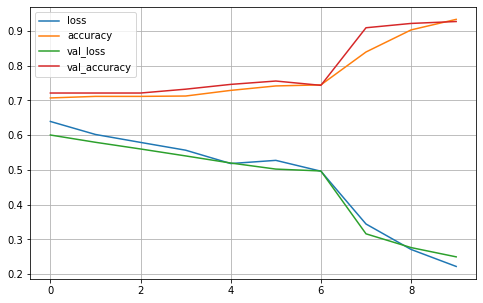

In [ ]:
from matplotlib import pyplot as plt
pd.DataFrame(history.history).plot(figsize=(8, 5))
plt.grid(True)
plt.show()

Out put files

##Cindy's Modeling Section

I implement the data using spacy.

In [ ]:
import pandas as pd
import spacy

In [ ]:
train = dataset.sample(frac=0.7, random_state=25)
test = dataset.drop(train.index)
print(f"No. of training examples: {train.shape[0]}")
print(f"No. of testing examples: {test.shape[0]}")

No. of training examples: 3620
No. of testing examples: 1551


In [ ]:
train['label'] = [{"spam": bool(y), "ham": not bool(y)}
                  for y in train.label_num.values]

In [ ]:
train['label']

5016    {'spam': False, 'ham': True}
1635    {'spam': False, 'ham': True}
3756    {'spam': False, 'ham': True}
3470    {'spam': True, 'ham': False}
4849    {'spam': False, 'ham': True}
                    ...             
2765    {'spam': False, 'ham': True}
2630    {'spam': False, 'ham': True}
1041    {'spam': False, 'ham': True}
4715    {'spam': False, 'ham': True}
1775    {'spam': False, 'ham': True}
Name: label, Length: 3620, dtype: object

In [ ]:
from sklearn.model_selection import StratifiedShuffleSplit
splt = StratifiedShuffleSplit(n_splits=1, test_size=0.2, random_state=1)
for train_idx, valid_idx in splt.split(train, train['label_num']):
  train_set = train.iloc[train_idx]
  valid_set = train.iloc[valid_idx]

print(train_set['label_num'].value_counts()/len(train_set))
print(valid_set['label_num'].value_counts()/len(valid_set))

0    0.713398
1    0.286602
Name: label_num, dtype: float64
0    0.712707
1    0.287293
Name: label_num, dtype: float64


In [ ]:
train_text = train_set['text'].values
train_label = train_set['label']
valid_text = valid_set['text'].values
valid_label = valid_set['label']

train_label = [{"cats": label} for label in train_label]
valid_label = [{"cats": label} for label in valid_label]

train_data = list(zip(train_text, train_label)) 

test_text = (test['text']).values

In [ ]:
test_label = (test['label_num']).values

In [ ]:
print(train_label[0])

{'cats': {'spam': False, 'ham': True}}


In [ ]:
nlp = spacy.blank('en')
email_cat = nlp.create_pipe('textcat')

In [ ]:
nlp.add_pipe(email_cat)

In [ ]:
email_cat.add_label("ham")
email_cat.add_label("spam")

1

In [ ]:
from spacy.util import minibatch
import random
def train(model, train, optimizer, batch_size=8):
  loss={}
  random.seed(1)
  random.shuffle(train)
  batches = minibatch(train, size=batch_size)
  for batch in batches:
    text, label=zip(*batch)
    model.update(text, label, sgd=optimizer, losses=loss)
  return loss

In [ ]:
def predict(model, text):
  docs = [model.tokenizer(txt) for txt in text]
  emailpred = model.get_pipe('textcat')
  score,_=emailpred.predict(docs)
  pred_label=score.argmax(axis=1)
  return pred_label

In [ ]:
def evaluate(model, text, label):
  pred = predict(model, text)
  true_class = [int(lab['cats']['spam']) for lab in label]
  correct = (pred == true_class)
  acc = sum(correct)/len(correct)
  return acc

In [ ]:
n = 10
opt = nlp.begin_training()
for i in range(n):
  loss = train(nlp, train_data, opt)
  acc = evaluate(nlp, valid_text, valid_label)
  print(f"Loss: {loss['textcat']:.3f} \t Accuracy: {acc:.3f}")

Loss: 0.902 	 Accuracy: 0.939
Loss: 0.226 	 Accuracy: 0.967
Loss: 0.106 	 Accuracy: 0.970
Loss: 0.112 	 Accuracy: 0.961
Loss: 0.062 	 Accuracy: 0.946
Loss: 0.043 	 Accuracy: 0.967
Loss: 0.056 	 Accuracy: 0.953
Loss: 0.045 	 Accuracy: 0.961
Loss: 0.027 	 Accuracy: 0.961
Loss: 0.065 	 Accuracy: 0.971


In [ ]:
pred = predict(nlp, test_text)
from sklearn.metrics import classification_report
print(classification_report(test_label, pred))

              precision    recall  f1-score   support

           0       0.96      0.99      0.97      1090
           1       0.98      0.89      0.94       461

    accuracy                           0.96      1551
   macro avg       0.97      0.94      0.95      1551
weighted avg       0.96      0.96      0.96      1551

